Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 113ms/step - accuracy: 0.7041 - loss: 0.5487 - val_accuracy: 0.8098 - val_loss: 0.4311
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.8655 - loss: 0.3330 - val_accuracy: 0.8227 - val_loss: 0.3937
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8962 - loss: 0.2613 - val_accuracy: 0.8401 - val_loss: 0.3698
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.9182 - loss: 0.2236 - val_accuracy: 0.8470 - val_loss: 0.3957
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.9377 - loss: 0.1682 - val_accuracy: 0.8433 - val_loss: 0.4266
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8403 - loss: 0.4377

Test score: 0.4266
Test accuracy: 0.8433
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


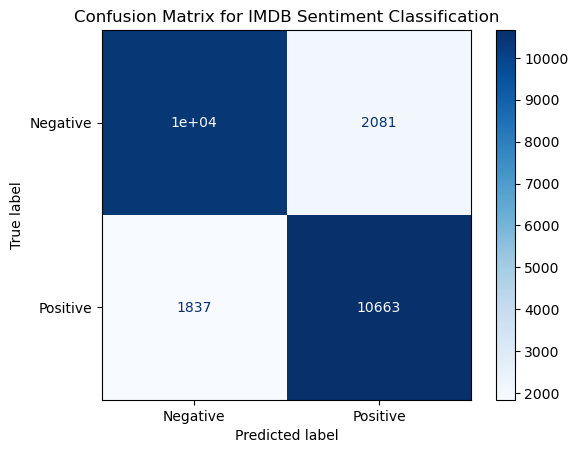

Enter a movie review: great movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Review: great movie
Predicted Sentiment: Positive 😊 (Confidence: 0.85)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np

# Set the parameters
max_features = 10000  # Number of most frequent words to keep
maxlen = 100  # Max review length
batch_size = 32

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure all reviews are the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'\nTest score: {score:.4f}')
print(f'Test accuracy: {acc:.4f}')

word_index = imdb.get_word_index()

# Adjust word_index to account for special tokens in the IMDB dataset
word_index = {k: (v + 3) for k, v in word_index.items()}  # Shift indices to add space for <PAD>, <START>, etc.
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Function to encode and predict sentiment from user input
def predict_sentiment(review_text):
    words = text_to_word_sequence(review_text)
    encoded = [1]  # start token
    for word in words:
        index = word_index.get(word, 2)  # Use 2 for unknown words
        if index < max_features:
            encoded.append(index)

    padded = pad_sequences([encoded], maxlen=maxlen)
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😞"
    print(f"\nReview: {review_text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {prediction:.2f})")
    
    
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_prob = model.predict(x_test, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for IMDB Sentiment Classification")
plt.show()


user_review = input("Enter a movie review: ")
predict_sentiment(user_review)

In [2]:
user_review = input("Enter a movie review: ")
predict_sentiment(user_review)

Enter a movie review: it was a complete waste of time
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Review: it was a complete waste of time
Predicted Sentiment: Negative 😞 (Confidence: 0.01)
